# Hello world of TensorFlow: NN on MNIST dataset
## Import the relevant libraries

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the dataset

In [2]:
mnist = tf.keras.datasets.mnist

In [5]:
type(mnist)

module

In [6]:
type(tf)

module

the mnist is imported here as a module. We need to load the data from this module. We'll do it by creating immediatly a train set and a test set:

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

x_train has a shape of a matrix with 60000 elements (rows) and each element is an image of 28x28 pixels

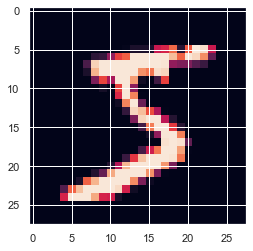

In [14]:
first_number = x_train[0]
imgplot = plt.imshow(first_number)

Looks like we got a "5" as first number. As it is made easy for beginners, the whole dataset is already preprocessed and ready to use. However, we still need to normalize it is some way.
## Scaling

In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0

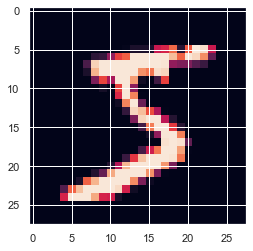

In [16]:
first_number_normed = x_train[0]
imgplot2 = plt.imshow(first_number_normed)

Looks like nothing changed, but let's take a look at each pixels:

In [17]:
first_number_normed

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
tf.keras.models.Sequential?

Init signature: tf.keras.models.Sequential(layers=None, name=None)
Docstring:     
Linear stack of layers.

Arguments:
    layers: list of layers to add to the model.

Example:

python
Optionally, the first layer can receive an `input_shape` argument:
model = Sequential()
model.add(Dense(32, input_shape=(500,)))
Afterwards, we do automatic shape inference:
model.add(Dense(32))

Sequential is gonna make a model (a Sequential model). That's the basic building block of anything related to deep learning in Kearas. It takes a series of layers (There are different kinds of layers: Dense, Flatten, Dropout etc...) and it makes a model with them. We are building neural networks one layer at a time, in sequence: Input layer, hidden layer 1, hidden layer 2 etc...output layer.

Each layer has exactly one input tensor and one output tensor.

To create a Sequential model, we need to pass a list of layers to the Sequential constructor.Generally, all layers in keras need to know the shape of their input in order to be able to create their weights.

In [25]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10) #10 because there are 10 different numbers
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Here we've created a model with 4 layers. We have 3 kind of different layers. The difference between them is the kind of neurone it is composed of.
- Dense: It is the standard fully connected layer
- Flatten: This layer flatten the matrix it get as input to a single 2-dimensional matrix. That why the output here has a shape (,784 = 28*28).
- Dropout: During the training phase, certain set of neurons, chosen randomly, are simply shot down. As they are ignored (with a probability 1-p)  we prevent overfitting.

What a layer does is basically this: It takes a matrix, we don't know what is it,it does something (thanks to the activation function), and spits out a matrix with the chosen shape.

In [67]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.4744618 ,  0.0957942 , -0.72659004,  0.44679648,  0.5415132 ,
         0.29720017, -0.0123118 ,  0.32472044, -0.3062479 ,  0.3113895 ]],
      dtype=float32)

Here we tried the NN with the first element of the x_train (the previous 5). The thing is that our model is not trained. For now we can't clearly see it since the result is given as a logit vector (This is the log-oods score for each class).

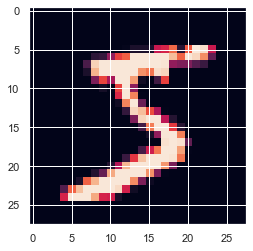

In [41]:
plt.imshow(x_train[:1][0])

In [68]:
tf.nn.softmax(predictions).numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: id=321, shape=(1, 10), dtype=float32, numpy=
array([[0.1307459 , 0.0895313 , 0.03933851, 0.12717837, 0.1398132 ,
        0.10950763, 0.08035725, 0.11256316, 0.05989219, 0.11107255]],
      dtype=float32)>>

By using this activation function, we can get the probability for the input variable to be classified in each class. We can see that the we almost got an equiprobability for the input to be classified in each class. That's because the model is not trained, it doesn't know how to class for now. Let's train it.

In [44]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This will be the loss function we are going to use in our model. this function needs to be decreased each time the NN sees the whole train set.

In [46]:
loss_fn(y_train[:1],predictions).numpy()

2.211761

In [69]:
model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

Finally, we train the model with the command "compile". The optimizer here the "adam". We won't get into the detail of how the adam optimizer works, but it's most of the time a great optimizer.

In [70]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 272us/sample - loss: 0.2925 - accuracy: 0.9148
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1426 - accuracy: 0.9582
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1067 - accuracy: 0.9680
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0893 - accuracy: 0.9722
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0742 - accuracy: 0.9769


We can see that the loss decrease with each epoch and that the algorithm learns fast.

In [71]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0384 - accuracy: 0.9764


[0.07510923032686115, 0.9764]

Finally the model is trained and has a really nice accuracy of 97%.

In [72]:
predictions_trained = model(x_train[:1]).numpy()
tf.nn.softmax(predictions_trained).numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: id=30157, shape=(1, 10), dtype=float32, numpy=
array([[2.3113440e-11, 1.0355027e-07, 7.8175177e-08, 1.7938066e-02,
        2.9097524e-17, 9.8206156e-01, 1.5478521e-11, 1.7688376e-09,
        6.4019079e-10, 9.9188462e-08]], dtype=float32)>>

The result is now clearly a 5.